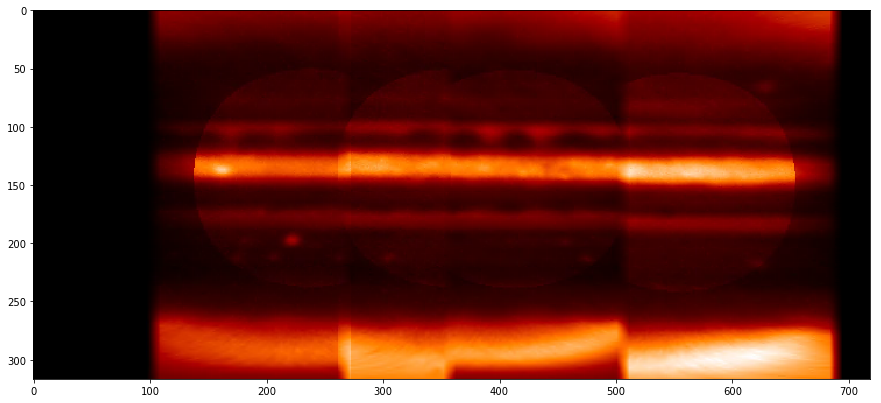

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(15,12))
plt.imshow(mpimg.imread('imgs/2018jul_2.16_lmap.png'))
plt.show()

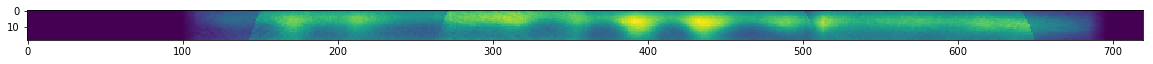

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 1))
data = np.flip(fits.open("fits/2018jul_2.16_neb.fits")[0].data, 0)
plt.imshow(data)
plt.show()

In [5]:
from copy import deepcopy

def rollingMedian(data, numWindows=10):
    rollingMed = deepcopy(data)
    windowSize = int(len(data)/numWindows)
    for i in range(0, len(data), windowSize):
        if i+windowSize > len(data):
            rollingMed[i:] = np.full(len(data)-i, np.median(data[i:]))
        else:
            rollingMed[i:i+windowSize] = np.full(windowSize, np.median(data[i:i+windowSize]))
    return rollingMed

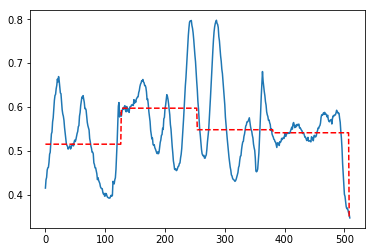

In [15]:
avg = np.mean(data, 0)[150:660]
lon = np.arange(len(avg))
plt.plot(lon, avg)
plt.plot(lon, rollingMedian(avg, numWindows=4), color='red', linestyle='--')
plt.show()

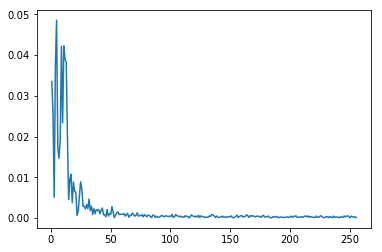

In [16]:
#(Non-detrended data)

from scipy import fft
N = len(avg)
T = 1.0/N
x = np.linspace(0.0, N * T, N)
fourier = fft(avg)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf[1:], 2.0/N * np.abs(fourier[1:N//2]))
plt.show()

In [17]:
#wave power in descending order
print(np.flip(np.argsort(fourier[0:N//2]))[:10])
#wave powers corrected for observation width
print(720 / N * np.flip(np.argsort(fourier[0:N//2]))[:10])

[ 0  2  7  4 25 21 24 28 18 34]
[ 0.          2.82352941  9.88235294  5.64705882 35.29411765 29.64705882
 33.88235294 39.52941176 25.41176471 48.        ]


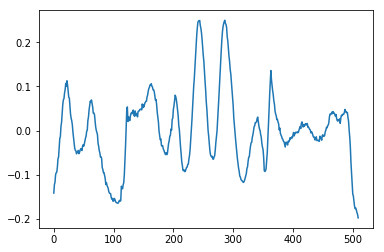

In [18]:
avg_detrended = avg-rollingMedian(avg, numWindows=3)
plt.plot(lon, avg_detrended)
plt.show()

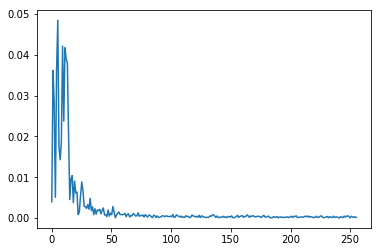

In [19]:
N = len(avg_detrended)
T = 1.0/N
x = np.linspace(0.0, N * T, N)
fourier_detrended = fft(avg_detrended)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(fourier_detrended[0:N//2]))
plt.show()

In [20]:
print(np.flip(np.argsort(fourier_detrended[0:N//2]))[:10])
print(720 / N * np.flip(np.argsort(fourier_detrended[0:N//2]))[:10])

[ 2  7  4 25 21 24  0 28 18 34]
[ 2.82352941  9.88235294  5.64705882 35.29411765 29.64705882 33.88235294
  0.         39.52941176 25.41176471 48.        ]
